Analysis of the Heat Equation in the Unit Square using Peaceman Rachford ADI Method

By: Ryan Reiff

Below I have implemented the method under the following conditions

ut = D(uxx + uyy)

u(0,x,y) = sin(pi*x)*sin(piy) 

Homogeneous Dirichlet boundary condition u = 0

Let D = 1

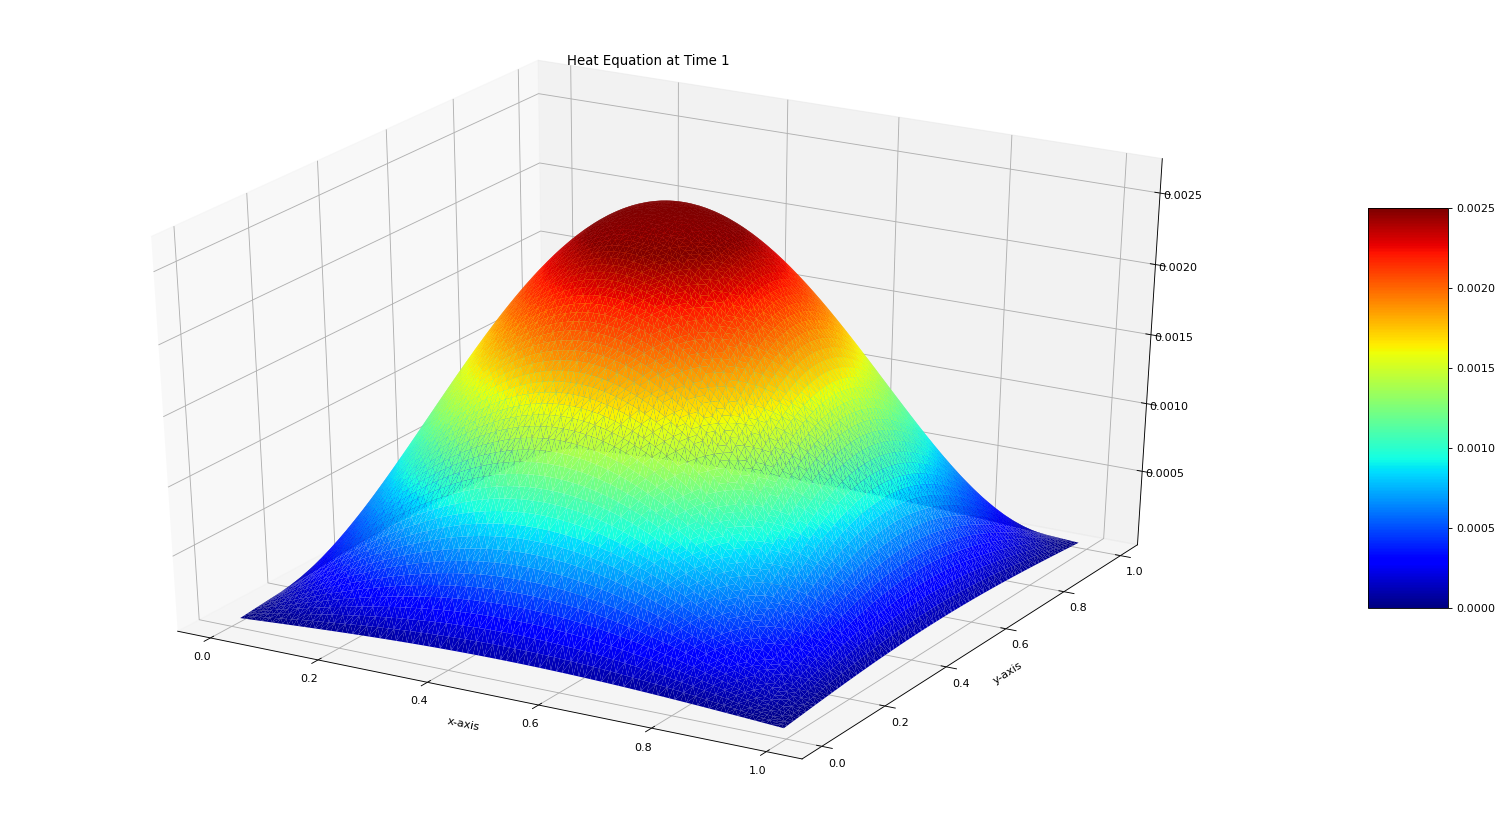

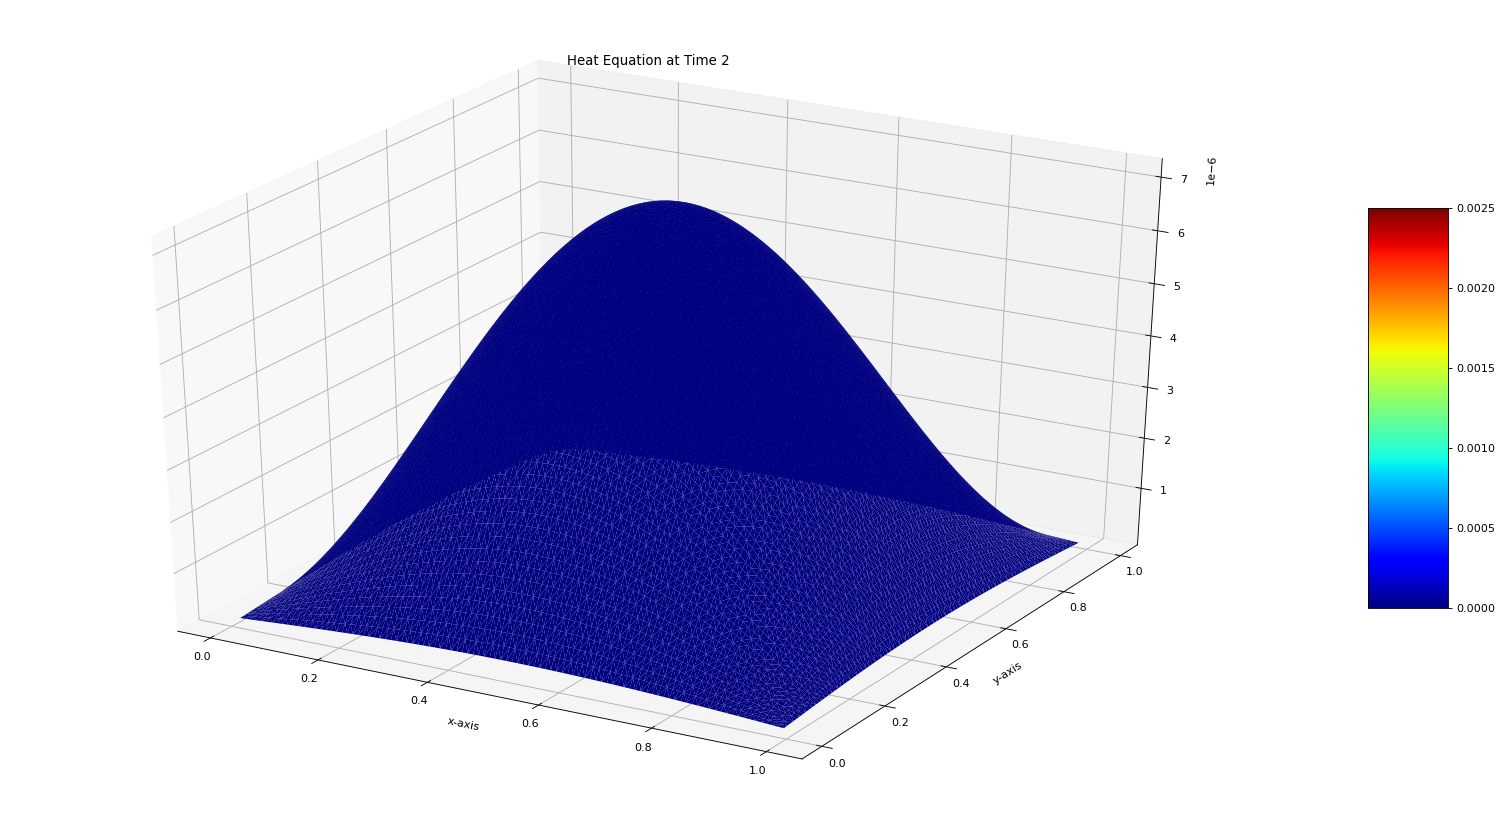

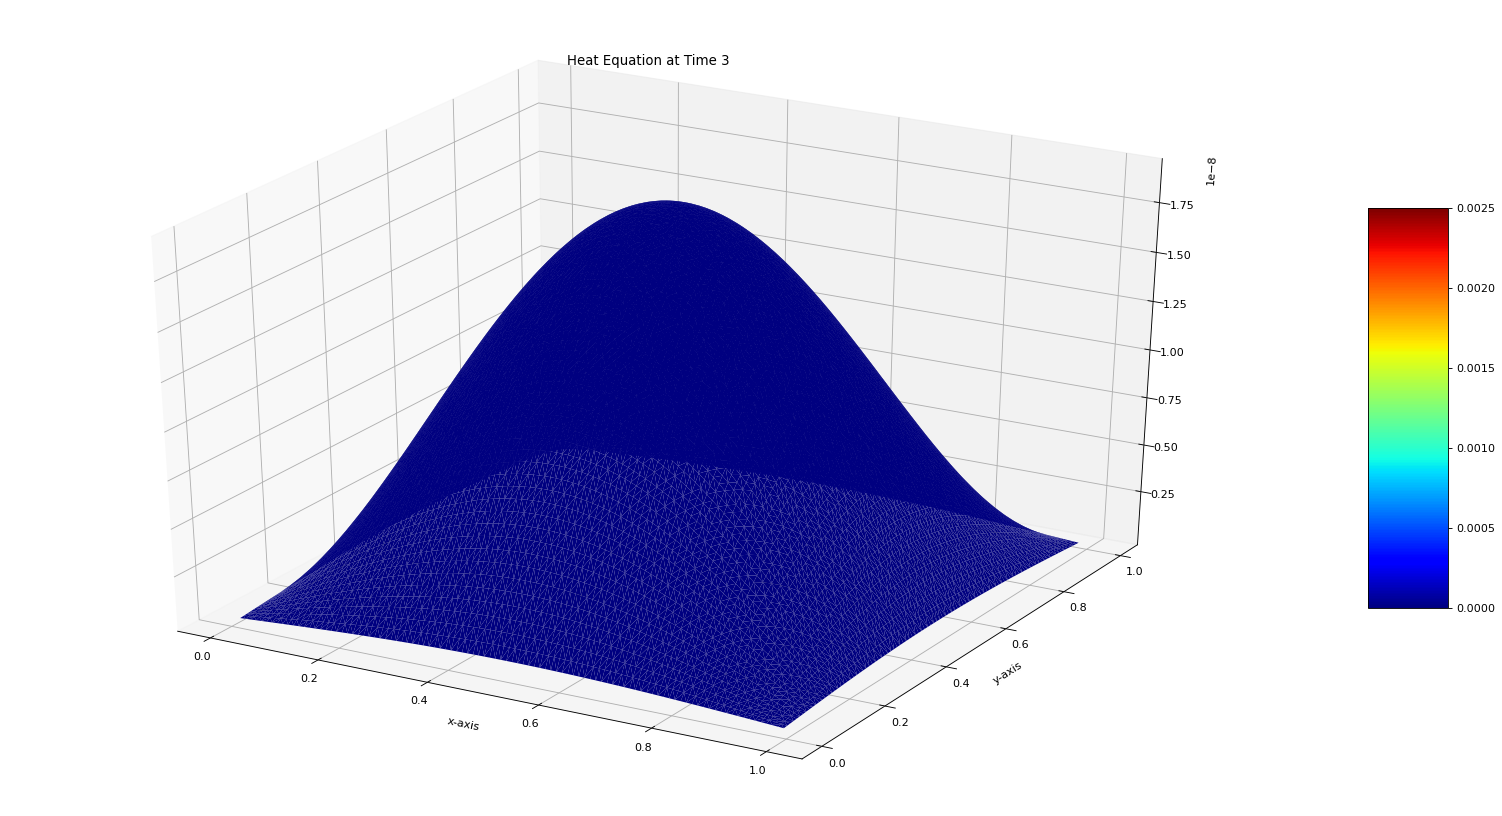

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from scipy.linalg import solve
from mpl_toolkits.mplot3d import Axes3D

h = 0.01
n = 100
D = 1
k = 0.001
r = (k*D)/(2*h**2)
#assuming deltax = deltay = h

def Createb():
    b = np.zeros((n-1,n-1))
    x = np.arange(0+h,1,h)
    y = np.arange(0+h,1,h)
    for j in range (0,n-1):
        for i in range(0,n-1):
            b[j,i]= math.sin(math.pi*x[i])*math.sin(math.pi*y[j])
    b = b.T
    return (b)
def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)
def CreateA2():
    A2 = np.zeros((n-1,n-1))
    A2[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A2[i,i]= (1-2*r)
        A2[i,i+1]= r
        A2[i+1,i]= r
    return (A2)

def CreateX():
    A = np.zeros((n-1,n-1))
    x = np.arange(0+h,1,h)
    for i in range (0,n-1):
        A[i] = x
    return (A)

def CreateY():
    A = np.zeros((n-1,n-1))
    y = np.arange(0+h,1,h)
    for j in range (0,n-1):
        for i in range(0,n-1):
            A[j,i] = y[j]
    return (A)

def Time1():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(300):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole)

def Time2():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(600):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole)

def Time3():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(900):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole)

Z1 = Time1().ravel()
Z2 = Time2().ravel()
Z3 = Time3().ravel()

X = CreateX().ravel()
Y = CreateY().ravel()

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z1, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=0.0025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Heat Equation at Time 1")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z2, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=0.0025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Heat Equation at Time 2")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
surf = ax.plot_trisurf(X, Y, Z3, cmap=cm.jet, linewidth=0.1, vmin=0, vmax=0.0025)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Heat Equation at Time 3")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

Now doing the Resolution Study in order to check for bugs in the above method

Below is the code to find a specific point in space and time for k

In [2]:
h = 0.01
n = 100
D = 1
k = 0.001
r = (k*D)/(2*h**2)
#assuming deltax = deltay = h

def Createb():
    b = np.zeros((n-1,n-1))
    x = np.arange(0+h,1,h)
    y = np.arange(0+h,1,h)
    for j in range (0,n-1):
        for i in range(0,n-1):
            b[j,i]= math.sin(math.pi*x[i])*math.sin(math.pi*y[j])
    b = b.T
    return (b)
def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)
def CreateA2():
    A2 = np.zeros((n-1,n-1))
    A2[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A2[i,i]= (1-2*r)
        A2[i,i+1]= r
        A2[i+1,i]= r
    return (A2)
def Time1():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(250):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole[10][10])
Time1()

0.0008255229235462322

Below is the code to find a specific point in space and time for k/2

In [3]:
h = 0.01
n = 100
D = 1
k = 0.001/2
r = (k*D)/(2*h**2)
#assuming deltax = deltay = h

def Createb():
    b = np.zeros((n-1,n-1))
    x = np.arange(0+h,1,h)
    y = np.arange(0+h,1,h)
    for j in range (0,n-1):
        for i in range(0,n-1):
            b[j,i]= math.sin(math.pi*x[i])*math.sin(math.pi*y[j])
    b = b.T
    return (b)
def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)
def CreateA2():
    A2 = np.zeros((n-1,n-1))
    A2[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A2[i,i]= (1-2*r)
        A2[i,i+1]= r
        A2[i+1,i]= r
    return (A2)

def Time2():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(500):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole[10][10])
Time2()

0.0008255477197776234

Below is the code to find a specific point in space and time for k/4

In [4]:
h = 0.01
n = 100
D = 1
k = 0.001/4
r = (k*D)/(2*h**2)
#assuming deltax = deltay = h

def Createb():
    b = np.zeros((n-1,n-1))
    x = np.arange(0+h,1,h)
    y = np.arange(0+h,1,h)
    for j in range (0,n-1):
        for i in range(0,n-1):
            b[j,i]= math.sin(math.pi*x[i])*math.sin(math.pi*y[j])
    b = b.T
    return (b)
def CreateA():
    A = np.zeros((n-1,n-1))
    A[n-2,n-2]= (1+2*r)
    for i in range (0,n-2):
        A[i,i]= (1+2*r)
        A[i,i+1]= -r
        A[i+1,i]= -r
    return (A)
def CreateA2():
    A2 = np.zeros((n-1,n-1))
    A2[n-2,n-2]= (1-2*r)
    for i in range (0,n-2):
        A2[i,i]= (1-2*r)
        A2[i,i+1]= r
        A2[i+1,i]= r
    return (A2)

def Time1():
    A = CreateA()
    A2 = CreateA2()
    X = np.matmul(A2,Createb())

    for i in range(1000):
        ukhalf = solve(A,X)
        ukwhole = solve(A,np.matmul(A2,ukhalf))
        X = np.matmul(A2,ukwhole)
    return(ukwhole[10][10])
Time1()

0.0008255539188671563

Now compute R(k) to find the proper ratio.

R(k) = (v(k) - v(k/2)) / (v(k/2) - v(k/4))

In [5]:
print ((0.0008255229235462322 - 0.000825547719778164)/((0.000825547719778164 - 0.0008255539188677379)))

3.999979615737099


Since this is clearly equivalent to 4 which is equal to 2^2, we can see that this method is of order two as it should be, and our code seems to run just fine and be bug free.